<a href="https://colab.research.google.com/github/mttcrn/AI-things/blob/main/Machine%20Learning/01-Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Let us consider the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In the dataset we have data regarding specific species of flowers :
- Sepal length;
- Sepal width;
- Petal length;
- Petal width;
- Species (*Iris setosa*, *Iris virginica* e *Iris versicolor*).

In the specific, we have N = 150 total samples (50 per class).

<img src='https://drive.google.com/uc?id=1cBVClKfJOVXwK-VCjwd9XzRgCN-wvec_' width=250>

## Loading


We need to import **matplotlib** and **pandas** to handle data and plots.

In [ ]:
import pandas as pd #https://pandas.pydata.org/
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

We can find the dataset we need to analyse online. We use pandas to load the csv to a **pandas.DataFrame**.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

We can start to have a look the data we have

In [ ]:
dataset.head() #to visualize the dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we do not care about the flower species in this lesson, hence we remove that column:

In [ ]:
dataset = dataset.drop('class', axis=1)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will try to understand how the feature are distributed, by printing some statistics:

In [ ]:
dataset.describe() #initial insights into data

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizing data can also be very helpful:

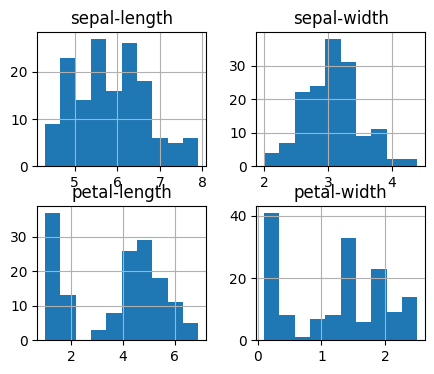

In [ ]:
dataset.hist(figsize=(5,4)) #histograms, figsize(lenght, height)
plt.show()

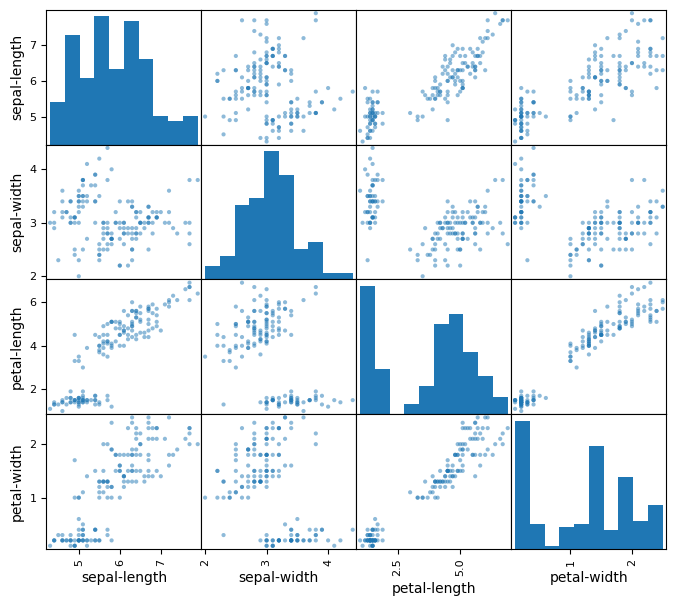

In [ ]:
scatter_matrix(dataset, figsize=(8, 7))
plt.show()

As we can see from the plots, *petal-lenght* and *petal-width* seem to have a strong relationship, which may be linear.
We can apply linear regression.

<Axes: xlabel='petal-length', ylabel='petal-width'>

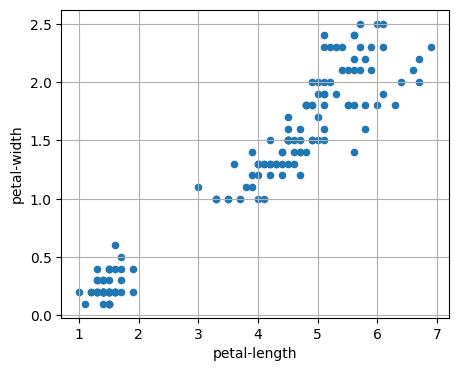

In [ ]:
dataset.plot.scatter('petal-length', 'petal-width', grid=True, figsize=(5,4))

## Preprocessing

Once we inspected the data, we should operate some preprocessing procedures. On a
generic dataset one should perform:

- shuffling;
- remove inconsistent data;
- remove outliers;
- normalize or standardize data;
- fill missing data.

In this case we are going to use the entire dataset, with a non-iterative method, hence we do not need to **shuffle**.

There seems not to be **outliers** from previous inspection.

Is there any **missing data**?

In [ ]:
import numpy as np #https://numpy.org/ #library for numerical computation

In [ ]:
np.any(np.isnan(dataset.values))

np.False_

we are lucky, no missing data, no outliers.

However it is always better to work with data in the same scale, hence we should normalize the columns we are going to use.

Given as samples $\{s_1, .., s_N\}$, we can either use:
- **zscore** function:
	$$s \leftarrow \frac{s - \bar{s}}{S} $$

	where $\overline{s} = {1 \over N}\sum_{n=1}^Ns_n$ and $S^2 = {1 \over N-1} \sum_{n=1}^N(s_n - \overline{s})^2$.
- min-max feature scaling:
	$$s \leftarrow \frac{s - \min_n \{ s_n \}}{\max_n \{ s_n \} - \min_n \{ s_n \}}$$

	where $s_{max} = \max_{n \in \{1, .., N\}}s_n$ and $s_{min} = \min_{n \in \{1, .., N\}} s_n$.

In [ ]:
from scipy.stats import zscore #https://scipy.org/

In [ ]:
#we reshape our feature column as a (n_sample, n_features) matrix
x = zscore(dataset['petal-length'].values).reshape(-1, 1)
y = zscore(dataset['petal-width'].values)
#with data in the same scale we can read the weights and make deduction
#high weight means that the variable has high influence

In [ ]:
np.std(x)

np.float64(0.9999999999999998)

## Using Scikit-Learn Toolbox

A linear model seems to be a good choice to predict *petal-width* given petal-length, let's use **scikit-learn** tools to do a linear regression:


In [ ]:
from sklearn import linear_model #https://scikit-learn.org/stable/

In [ ]:
lin_model = linear_model.LinearRegression()
lin_model.fit(x, y)
#x input matrix (petal lenght), y target matrix (petal width)

LinearRegression()

In [ ]:
lin_model.coef_

array([0.9627571])

In [ ]:
lin_model.intercept_

np.float64(-6.034544563891951e-16)

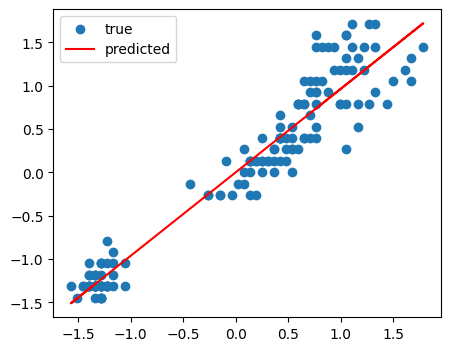

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(x, y, label='true')

w1 = lin_model.coef_ # weights of the model are stored here
w0 = lin_model.intercept_ # and here it is the intercept

# Compute the y component of the regression line

y_pred = lin_model.predict(x)
#y_pred = [w1 * sample + w0 for sample in x.flatten()]

plt.plot(x, y_pred, label='predicted', color='red')

# enlarging fonts
plt.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

To evaluate the quality of our regression we can analyse some metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

### Residual Sum of Squares

$RSS = \sum_n (\hat{t}_n-t_n)^2$ with $\hat{t_n} = y(x_n, w)$, it tells us how much of the prediction differs from the true value.

In [ ]:
RSS = np.sum((y_pred-y)**2)
RSS
RSS / 150 #150 = total number of data, basically MSE by hand

np.float64(0.07309877207799637)

### Coefficient of determination

$R^2 = 1 - \frac{RSS}{\sum_n (\bar{t}-t_n)^2}$, it tells us how the fraction of the variance of the data explained by the model (how much better we are doing w.r.t. just using the mean of the target $\bar{t} = \frac{\sum_n t_n}{N}$).

In spaces with a single feature this is equal to the correlation coefficient between the input and the output.

For a more detailed explanation: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
r2_score(y, y_pred)

0.9269012279220037

### Mean Squared Error

$MSE = \frac{\sum_n (\hat{t}_n-t_n)^2}{N}$, it tells approximately how much error we get on a predicted data over the training set (i.e., a normalized version of the RSS).

In [ ]:
mean_squared_error(y, y_pred)

0.07309877207799637

## Statistical Tests on Coefficients
Under the assumption that the observations $t_n$ are i.i.d. and satisfies $t_n = w_0 + \sum_j w_j x_{nj} + \epsilon$, where $\epsilon$ is a Gaussian noise with zero mean and variance $\sigma^2$ (i.e., the data are generated by a linear model with noise), the computed coefficients $\hat{w}_j$ are distributed as follows:
\begin{equation*}
	\frac{\hat{w}_j - w_j}{\hat{\sigma} \sqrt{v_j}} \sim t_{N - M -1}
\end{equation*}
where $w_j$ is the true parameter, $\hat{\sigma}$ is the unbiased estimated for the target variance, i.e., $\hat{\sigma}^2 = \frac{\sum_n (t_n - \hat{t}_n)^2}{N - M - 1}$, $v_j$ is the $j$-th diagonal element of the matrix $(X^T X)^{-1}$ and $t_{N - M-1}$ is the t-student distribution with $N - M - 1$ degrees of freedom.

This allow us to formulate some **statistical tests**:
- **Single coefficients** statistical test:
	It determine if the single coefficient is relevant or not.

	$$
	H_0: w_j = 0 \qquad \text{ vs. } \qquad H_1: w_j \neq 0
	$$

	$$
	t_{stat} = \frac{\hat{w}_j - w_j}{\hat{\sigma} \sqrt{v_j}} \sim t_{N - M - 1}
	$$

	where $t_{N - M - 1}$ is the T-Student distribution with $N-M-1$ degrees of freedom.

- **Overall significance** of the model (F-statistic):

	It considers the following hypothesis test:

	$$H_0: w_1 = \dots = w_M = 0 \text{ vs. }  H_1: \exists w_j \neq 0$$

	The F-statistic can be computed and is distributed as follows:
	$$
	F = \frac{dfe}{M }\frac{\sum_n (\overline{t}_n-t_n)^2- RSS}{RSS} \sim F_{M, N-M-1}
	$$

	where $F_{M, N-M-1}$ is the Fisher-Snedecor distribution with parameters $M$ and $N-M-1$.

These statistics are interpreted via the p-value, that is the probability of obtaining a statistic as extreme as (or more extreme than) the observed value, under the null hypothesis ($H_0$).
- If the p-value is small (e.g., < 0.05), reject $H_0$  → the predictor/model is significant.
- If the p-value is large, the predictor/model is likely not significant.

In [ ]:
from sklearn.feature_selection import f_regression

f_regression(x, y) #outputs a tuple:(value of the F-statistics, its p-value)
#sklearn does not provide a direct function for computing the t-statistics,
#if needed it must be manually computed.

(array([1876.65781288]), array([5.77666099e-86]))

If one wants all the information about the output of a linear model in a single instruction, just use the library **statsmodels** and use the function **summary()** on the result of the Ordinary Least Square optimization procedure

In [ ]:
from statsmodels import api as sm
lin_model2 = sm.OLS(y, x).fit()
print(lin_model2.summary()) #info about regression employed

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1889.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                    1.56e-86
Time:                        14:18:32   Log-Likelihood:                         -16.645
No. Observations:                 150   AIC:                                      35.29
Df Residuals:                     149   BIC:                                      38.30
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
lin_model2._results.params

array([0.9627571])

In [ ]:
lin_model2._results.k_constant

0

## Custom Implementation

We can also implement Least-Squares from scratch, using its closed-form:

\begin{equation}
\hat{\mathbb{w}}_{OLS} = (\mathbb{\Phi}^{\top}\mathbb{\Phi})^{-1}\mathbb{\Phi}^{\top}\ \mathbb{t},
\end{equation}

where $\mathbb{\Phi}= (\phi(x_1), \dots, \phi(x_N))^{\top}$ and $\mathbb{t} = (t_1, \dots, t_N)^{\top}.$

By using **numpy**:


In [ ]:
from numpy.linalg import inv

n_samples = len(x)
Phi = np.ones((n_samples, 2))
Phi[:, 1] = x.flatten() # the second column is the feature
# the field 'T' represents the transposed matrix, @ is the matrix product, the method 'dot' is the matrix product
w = inv(Phi.T @ Phi) @ (Phi.T.dot(y))

In [ ]:
w

array([-4.73835865e-16,  9.62757097e-01])

## Regularization

If we need to mitigate over-fitting effects in a model we might resort to some regularization techniques, like Ridge regression or Lasso regression.

### Ridge Regression
Linear least squares with l2 regularization.

In [ ]:
ridge_model = linear_model.Ridge(alpha=10)
ridge_model.fit(x, y)

Ridge(alpha=10)

### Lasso Regression

Linear Model trained with L1 prior as regularizer.

In [ ]:
lasso_model = linear_model.Lasso(alpha=10)
lasso_model.fit(x, y)

Lasso(alpha=10)

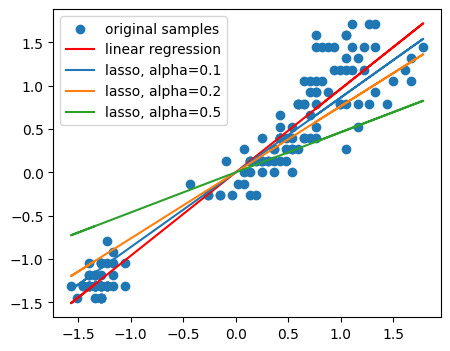

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(x, y, label='original samples')
y_linear = [lin_model.coef_ * x_i + lin_model.intercept_ for x_i in x]
plt.plot(x, y_linear, label='linear regression', color='red')
for alpha in [0.1, 0.2, 0.5]:
  # lasso regression
  lasso_model = linear_model.Lasso(alpha=alpha)
  lasso_model.fit(x, y)
  y_lasso = [lasso_model.coef_ * x_i + lasso_model.intercept_ for x_i in x]
  plt.plot(x, y_lasso, label='lasso, alpha={}'.format(alpha))

plt.legend(prop={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
mean_squared_error(y, lasso_model.predict(x))

0.3230987720779964